# Métodos III - Cálculo Vectorial


## Integral de superficie


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Abril 2020


In [13]:
import time
print(' Last version ', time.asctime() )

 Last version  Fri Apr 24 11:05:07 2020


### Objectivos

Revisar la parametrización de superficies

Definir la integral de una función escalar y vectorial en una superficie.

Mostrar algunos ejemplos sencillos.

In [14]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Integral en una superficies

#### Revisión de parametrización de superficies.

Hemos visto con anterioridad que podemos parametrizar una superficie, ${\bf \sigma}(u, v)$, de un espacio $\mathrm{R}^3$ como una función vectorial definida en un región $R$ de un espacio $(u, v)$ de $\mathrm{R}^2$.

$$
\sigma(u, v) = \left( x(u, v), \, y(u, v), \, z(u, v) \right)
$$


*Ejemplo*: parametrización de un cilindro centrado en el origen, con eje en $z$, radio $r$, y longitud infinita

$$
\sigma(\phi, z) = (r \cos \phi, \, r \sin \phi, z), \; \phi \in [0, 2\pi), \, z \in \mathrm{R}
$$

*Observa*: como las siguientes figuras están dibujadas a partir de la malla de $(u, v)$. Puedes ver su cuadrícula. 

*Observa:* fíjate también en las líneas de la superficie, cada una ellas corresponde al caso en la que $u$ o $v$ son constantes y la otra variable recorre los posible valores de su rango.


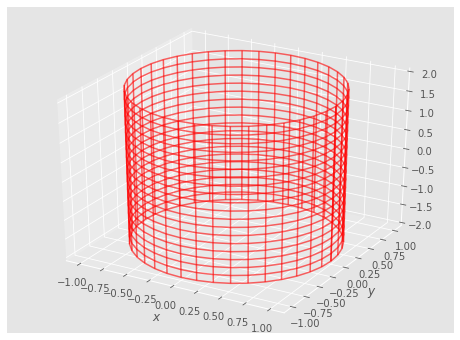

In [4]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 41)
zrange   = (-size, size, 20) 
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi) 
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);

*Ejemplo*: Parametrización de una esfera centrada en el origen de radio $r$.

$$
\sigma(\theta, \phi) = \left( r \sin \theta \cos \phi, r \sin \theta \sin \phi, r \cos \theta \right), \; \theta \in [0, \pi], \, \phi \in [0, 2 \pi)
$$

*Observa:* fíjate también en las líneas de la superficie, cada una ellas corresponde al caso en la que $u$ o $v$ son constantes y la otra variable recorre los posible valores de su rango.



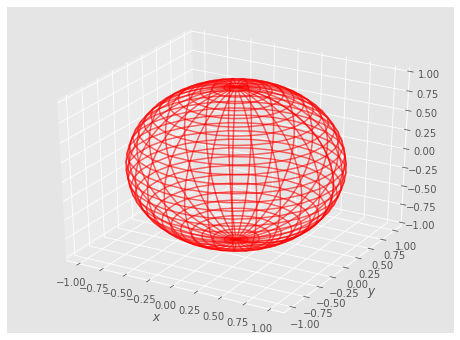

In [5]:
phirange   = (0., 2*np.pi, 30)
thetarange = (0.,   np.pi, 30) 
xfun = lambda phi, theta : r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, alpha = 0.6);

La superficie se construye a partir de líneas maestras. Fijado un valor de $u = u'$, si recorremos $v$ en su rango, $[v_0, v_1]$ obtenenos las líneas maestras a lo largo de $v$. 

$$
{\bf c}_{u'}(v) = \left( x(u', v), y(u', v), z(u', v) \right), \; u = u' , \, v \in [v_0, v_1]
$$

Y viceversa:

$$
{\bf c}_{v'}(u) = \left( x(u, v'), y(u, v'), z(u, v') \right), \; u = [u_0, u_1] , \, v = v'
$$




*Observa*: En la siguiente figura están marcadas dos de las líneas maestras del cilindro. 

*Explora*: Cambia las líneas maestras que están dibujadas, cambiando el elemento $(i, j)$ de la malla $(u, v)$.

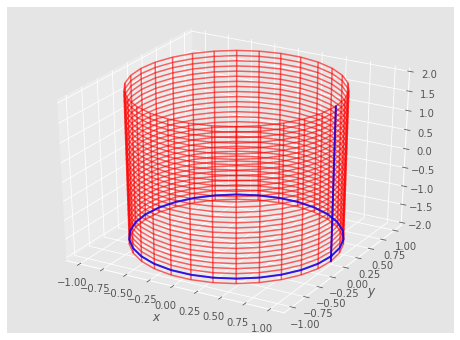

In [6]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 31)
zrange   = (-size, size, 31) 
phii, zj = 0, 1
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi)
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);
gf.wfmasterlines(xfun, yfun, zfun, phirange, zrange, ui = phii, vj = zj);

*Observa*: En la siguiente figura están marcadas dos de las líneas maestras de la esfera. 

*Explora*: Cambia las líneas maestras que están dibujadas, cambiando el elemento $(i, j)$ de la malla $(u, v)$.

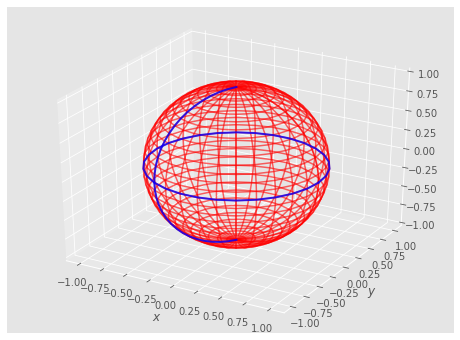

In [7]:
r          = 1.
phirange   = (0., 2*np.pi, 31)
thetarange = (0.,   np.pi, 31) 
phii, thetaj = 20, 15
f0         =  0.85
xfun = lambda phi, theta : f0 * r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : f0 * r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, alpha = 0.6);
gf.wfmasterlines(xfun, yfun, zfun, phirange, thetarange, ui = phii, vj = thetaj);
plt.gca(projection='3d').auto_scale_xyz((-1, 1), (-1, 1), (-1, 1))
#plt.gca().set_aspect('equal','box')

En un punto $(u, v)$ podemos obtenemos los vectores tangentes a las líneas en ese punto.

$$
{\bf t}_u  = \frac{\partial \sigma(u, v)}{ \partial u}, \;
{\bf t}_v  = \frac{\partial \sigma(u, v)}{ \partial v} 
$$

que están asociados a lo diferencial vectorial de arco de cada línea maestra:

$$
{\bf t}_u  \mathrm{d}u,  \;
{\bf t}_v  \mathrm{d}v 
$$




El vector normal a los dos vendrá dado por:
$$
{\bf n} = {\bf t}_u \times {\bf t}_v
$$

Si te das cuenta $|{\bf n}|$ es la normal a los dos vectores y su módulo corresponde al área del paralelogramo que sustentan ${\bf t}_u, \; {\bf t}_v$.

El diferencial de área
$$
\mathrm{d} \vec{\sigma} = {\bf n} \, \mathrm{d}u \mathrm{d} v, \; \mathrm{d}\sigma = |{\bf n}| \, \mathrm{d}u \mathrm{d} v,
$$

Diremos que una superficie es regular siempre que exista ${\bf n}$ en todo el rango de $(u, v)$. 

*Observa*: los vectores tangentes, ${\bf t}_u, \, {\bf t}_v$ a la superficie un punto y su vector normal ${\bf n}$.

*Explora*: cambia la posición $(i, j)$ de la malla de $(u, v)$ donde dibujamos los tres vectores.

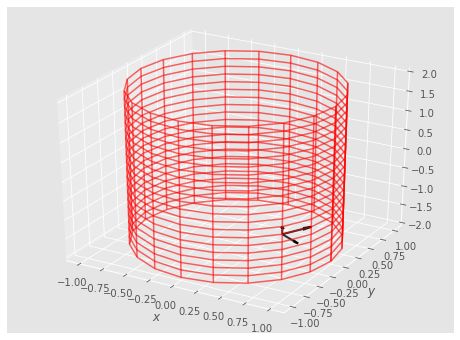

In [8]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 21)
zrange   = (-size, size, 21) 
phii, zj = 18, 6
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi)
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);
gf.wfaxis(xfun, yfun, zfun, phirange, zrange, ui = phii, vj = zj);

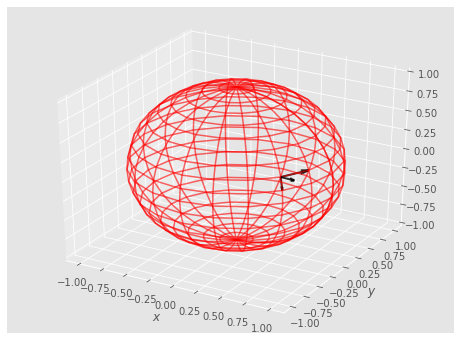

In [9]:
r          = 1.
phirange   = (0., 2*np.pi, 21)
thetarange = (0.,   np.pi, 21) 
thetai, phij = 8, 18
xfun = lambda theta, phi : r * np.sin(theta) * np.cos(phi)
yfun = lambda theta, phi : r * np.sin(theta) * np.sin(phi)
zfun = lambda theta, phi : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, thetarange, phirange, alpha = 0.6);
gf.wfaxis(xfun, yfun, zfun, thetarange, phirange, ui = thetai, vj = phij);

*Cuestión:* ¿Es la siguiente superficie regular? 

$$
\sigma (\phi, z) = \left(z \cos \phi, z \sin \phi, z \right), \; \phi \in [0, 2 \pi), z \ge 0
$$

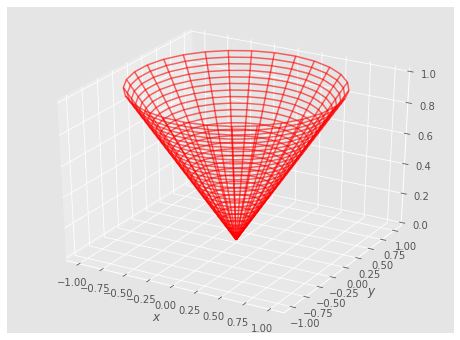

In [10]:
phirange = (0., 2*np.pi, 30)
zrange   = (0.,      1., 30) 
xfun = lambda phi, z : z * np.cos(phi)
yfun = lambda phi, z : z * np.sin(phi)
zfun = lambda phi, z : z 
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);

Si consideramos ahora en un punto $(u, v)$ los elementos diferenciales de arco en las dos líneas maestras:

$$
{\bf t}_u \mathrm{d}u, \; {\bf t}_v \mathrm{d}v
$$

El elemento diferencial de área que sustentan es:

$$
\mathrm{d} \sigma = | {\bf t}_u \times {\bf t}_v | \mathrm{d}u \mathrm{d}v
$$


Entonces, para obtener el área de una superficie parametrizada $\sigma (u, v)$ donde $(u, v)$ están definidas en una región $R$, calculamos:

$$
S = \int_{\sigma} \mathrm{d}\sigma = \int_{R} |{\bf n} | \mathrm{d}u \mathrm{d}v = \int_{R} |{\bf t}_u \times {\bf t}_v | \mathrm{d}u \mathrm{d}v
$$

*Ejemplo*: Calcula el área de una esfera de radio $r$.

La superficie parametrizada es:

$$
\sigma(\theta, \phi) = \left( r \sin \theta \cos \phi, r \sin \theta \sin \phi, r \cos \theta \right), \; \theta \in [0, \pi], \, \phi\in [0, 2 \pi]
$$

Los vectores directores:

$$
{\bf t}_\theta = \left( r \cos \theta \cos \phi ,  r \cos \theta \sin \phi, - r \sin \theta \right)
$$

$$
{\bf t}_\phi = \left( - r \sin \theta \sin \phi ,  r \sin \theta \cos \phi, 0 \right)
$$

Y el vector normal:

$$
{\bf n} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
r \cos \theta \cos \phi &  r \cos \theta \sin \phi & - r \sin \theta \\ - r \sin \theta \sin \phi &  r \sin \theta \cos \phi &  0 \end{array} \right| 
$$

Esto es:
   
$$
{\bf n} = \left( r^2 \sin^2 \theta \cos \phi, \; r^2 \sin^2 \theta \sin \phi, \; r^2 \cos \theta \sin \theta \right)
$$

Y por lo tanto
$$
|{\bf n}| = \sqrt{r^4 \sin^4 \theta + r^4 \cos^2 \theta \sin^2 \theta} = r^2\sin \theta
$$

El área de la superficie es:

$$
S = \int_{\sigma} \mathrm{d}\sigma = \int_R |{\bf n}| \mathrm{d} u \mathrm{d}v  = \int_0^\pi \int_0^{2\pi} r^2 \sin \theta \, \mathrm{d}\phi \mathrm{d} \theta
$$

$$
= r^2 \, \phi \Big|_0^{2 \pi} \, (-\cos \theta)\Big|_0^{\pi} = 4 \pi r^2
$$

##### Parametrización de la superficie de una gráfica.

Podemos considerar la gráfica de una función $f(x, y)$ definida en una reción $R$ como la parametrización de una superficie con $(x, y)$

$$
\sigma(x, y) = \left( x, y, z = f(x, y) \right)\; (x, y) \in \mathrm{R} 
$$


En este caso los vectores directores y el vector normal tienen expresiones más simples:

$$
{\bf t}_x(x, y) = \left( 1, 0, \frac{\partial z}{\partial x}\right), 
$$
$$
{\bf t}_y(x, y) = \left(0, 1, \frac{\partial z}{ \partial y} \right)
$$

y:

$$
{\bf n} 
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 1 &  0 & \frac{\partial z}{\partial x} \\
 0 &  1 & \frac{\partial z}{\partial y} \\
 \end{array} 
 \right| = \left(-\frac{\partial z}{\partial x}, -\frac{\partial z}{\partial y}, 1\right) 
$$

Y el módulo:
$$
|{\bf n}| = \sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2}
$$


*Observa*: la siguiente figura, donde se representa la gráfica de la función, $f(x, y) = x^2 + y^2$, y se dibuja una partición de la región $(x, y)$. Para cada uno de los rectángulitos de la gráfica, que es una pequeña sección de un plano, estamos dando su área como:

$$
\mathrm{d} \sigma =
\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2} \, \mathrm{d}x \mathrm{d}y
$$

Mientras que el área de los rectángulos en $(x, y) $que los sustentan es:
$
\mathrm{d}x\mathrm{d}y
$

Podemos reescribir:
$$
\mathrm{d}\sigma = \frac{\mathrm{d}x \mathrm{d}y}{\cos \gamma}, \;\;
\cos \gamma = \frac{1}{\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2}}
$$

Donde $\gamma$ es ahora el ángulo que forma la normal con el eje $z$.

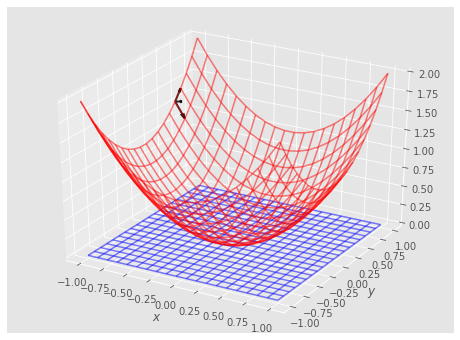

In [16]:
xrange = (-1., 1., 20)
xfun = lambda x, y : x
yfun = lambda x, y : y
zfun = lambda x, y : x*x + y*y
zero = lambda x, y : 0*x + 0*y
gf.wfsurface(xfun, yfun, zfun, xrange, xrange, alpha = 0.5);
gf.wfaxis   (xfun, yfun, zfun, xrange, xrange, 0, 15)
gf.wfsurface(xfun, yfun, zero, xrange, xrange, newfig = False, alpha = 0.5, color = 'b');


*Ejercicio*: Verifica que $\gamma$ es dicho ángulo para gráficas de planos


gamma 0.7853981633974483 cos(gamma) 0.7071067811865476


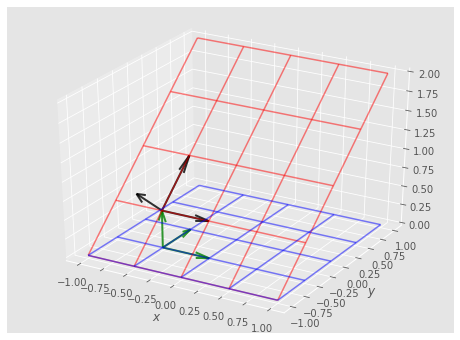

In [12]:
xrange = (-1., 1., 5)
a, b, c = 0., 1, 1.
cgamma = np.sqrt(1/(1+a*a+b*b))
xfun = lambda x, y : x
yfun = lambda x, y : y 
zfun = lambda x, y : a*x + b*y + c
zero = lambda x, y : 0*x + 0*y
gf.wfsurface(xfun, yfun, zfun, xrange, xrange, alpha = 0.5);
gf.wfsurface(xfun, yfun, zero, xrange, xrange, newfig = False, alpha = 0.5, color = 'b');
xi, yj = 1, 1
gf.wfaxis(xfun, yfun, zfun, xrange, xrange, ui = xi, vj = yj)
gf.wfaxis(xfun, yfun, zero, xrange, xrange, ui = xi, vj = yj, color = 'green')
print('gamma', np.arccos(cgamma), 'cos(gamma)', cgamma)

#### Integral de una función escalar en una superfice

Sea $S$ una superficie parametrizada con $\sigma(u, v)$ en una region $R$ de $(u, v)$, y $f(x, y, z)$ una función escalar definida en los puntos de la superficie. Llamamos integral de la función $f(x, y, z)$ en la superficie $\sigma(u, v)$ a:

$$
\int_{S} f(x, y, z) \, \mathrm{d}\sigma = \int_R f(\sigma(u, v)) \, |{\bf n}| \mathrm{d}u \mathrm{d}v 
$$


*Cuestión*: ¿Puedes dar una interpretación a la integral de una función escalar sobre una superficie?

*Ejercicio*: Integra la función $f(x, y, z) = \sqrt{x^2 + y^2 +1}$ en el helicoloide dado por: $\sigma (r, \theta) = \left( r \cos \theta, r \sin \theta, \theta \right)$ con $\theta \in [0, 2 \pi]$ y $r \in [0, 1]$

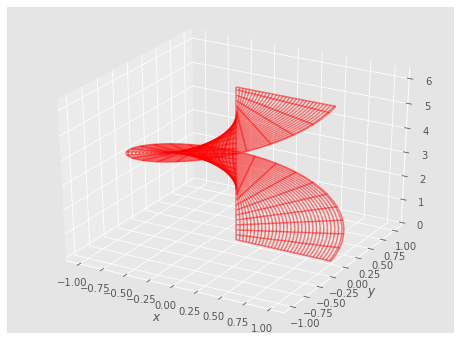

In [38]:
thetarange = (0., 2*np.pi, 60)
rrange     = (0.,      1., 60)
xfun = lambda r, theta : r * np.cos(theta) 
yfun = lambda r, theta : r * np.sin(theta) 
zfun = lambda r, theta : theta
gf.wfsurface(xfun, yfun, zfun, rrange, thetarange, alpha = 0.5);

A partir de la superficie parametrizada:
$$
\sigma (r, \theta) = \left( r \cos \theta, r \sin \theta, \theta \right)
$$

Calculamos los vectores:
$$
{\bf t}_r = \left( \cos \theta, \sin \theta, 0 \right),
$$
$$
{\bf t}_{\theta} = \left( - r \sin \theta, r \cos \theta, 1 \right)
$$

y el vector normal
$$
{\bf n} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
  \cos \theta      &  \sin \theta  & 0 \\
   - r \sin \theta & r \cos \theta & 1\\
 \end{array} 
 \right| = \left(\sin \theta, - \cos \theta, r \right) 
$$

La función en la superficie vale:
$$
f(\sigma(r, \theta)) = \sqrt{ r^2 \cos^2 \theta + r^2 \sin^2 \theta + 1} = \sqrt{r^2 +1 }
$$

El diferencial de área:
$$
\mathrm{d}\sigma = |{\bf n}| \mathrm{d}\theta \mathrm{d}r = \sqrt{1+r^2} \, \mathrm{d}\theta \mathrm{d}r
$$

Y la integral de la función en la superficie:

$$
\int_{\sigma} f(x, y, z) \mathrm{d} \sigma 
= \int_0^{2 \pi} \int_0^1 \sqrt{r^2 + 1} \sqrt{r^2 +1} \, \mathrm{d}r \mathrm{d}\theta 
$$
$$
= \int_0^{2 \pi} \int_0^1 (r^2 +1) \, \mathrm{d}r \mathrm{d}\theta 
= 2 \pi \left( r + \frac{r^3}{3 }\right) \Big|_0^1 = \frac{8 \pi}{3}
$$

#### Integral de una función vectorial a través de una superfice

Sea $S$ una superficie parametrizada con $\sigma(u, v)$ en una region $R$ de $(u, v)$, y ${\bf F}(x, y, z) = \left(F_x, F_y, F_z \right)$ una función vectorial definida en los puntos de la superficie.
Llamamos integral de la función ${\bf F}(x, y, z)$ a través de la superficie $\sigma(u, v)$ a:

$$
\int_{\sigma} {\bf F}(x, y, z) \, \mathrm{d} \vec{\sigma} = \int_R {\bf F}(\sigma(u, v)) \, {\bf n} \, \mathrm{d}u \mathrm{d}v 
$$




*Cuestión*: ¿Puedes dar una interpretación de la integral de un campo ${\bf F}$ a través de una superficie? En Física seguro que has encontrado este caso con anterioridad. ¡Se trata del flujo!

*Ejercicio*: Integra el campo ${\bf F}(x, y, z) = (x, y, z)$ sobre la esfera de radio unidad.

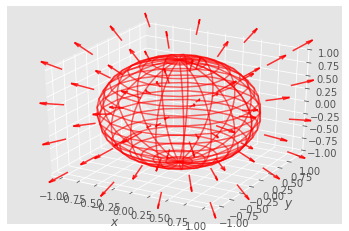

In [39]:
r = 1
phirange   = (0., 2*np.pi, 20)
thetarange = (0.,   np.pi, 20) 
xrange     = (-1., 1., 4)
Ex   = lambda x, y, z : x
Ey   = lambda x, y, z : y
Ez   = lambda x, y, z : z
xfun = lambda phi, theta : r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.quiver3d(Ex, Ey, Ez, xrange, xrange, xrange, color = 'r')
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, color = 'r', alpha = 0.6, newfig = False);

Vimos antes que:
$$
{\bf n} = \left(
\sin^2 \theta \cos \phi,  \sin^2 \theta \sin \phi, \cos \theta \sin \theta
\right)
$$

El campo en la esfera es:
$$
{\bf F}(\sigma(\theta, \phi)) 
= (\sin \theta \cos \phi, \sin \theta \sin \phi, \cos \theta)
$$

Por lo tanto:
$$
{\bf F}(\sigma (\theta, \phi)) \, {\bf n} = 
 \sin^3 \theta \cos^2 \phi +  \sin^3 \theta \sin^2 \phi + \sin \theta \cos^2 \theta =  \sin \theta
$$

Y la integral
$$
\int_{\sigma} {\bf F}({\bf x}) \, \mathrm{d} \vec{\sigma}
= \int_0^{2 \pi} \int_0^{\pi}  \sin \theta \, \mathrm{d}\theta \mathrm{d}\phi
= 4 \pi 
$$

